In [1]:
#How to implement Logisitic Regression

#collect data
#analyze data
#data Wrangling
    #cleaning the data
    #clearing null
#Train and Test
#Accuracy Check



In [2]:
#First collect the data
import pandas as pd
import numpy as np #numerical python: used for scientific notation
import seaborn as sns # statistical ploting
import matplotlib.pyplot as plt
import math
# to run in jupyter. Now we will get the plot even if we 
# don't use show()
%matplotlib inline 

titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(10) # gives first 10 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("# of passengers in original data: " + str(len(titanic_data.index)))

# of passengers in original data: 891


# Analyze Data


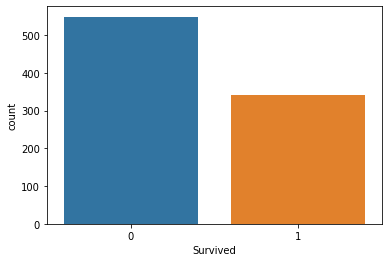

In [4]:
sns.countplot(x="Survived", data = titanic_data)

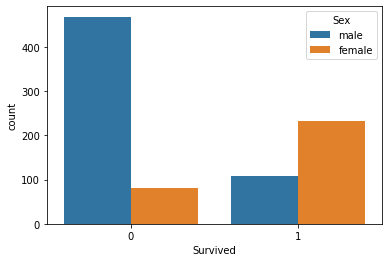

In [5]:
sns.countplot(x = "Survived", hue= "Sex", data=titanic_data )

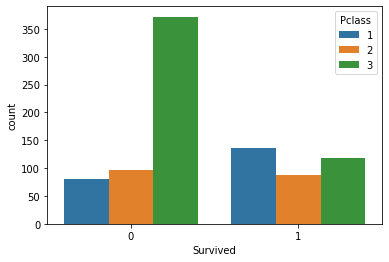

In [6]:
sns.countplot(x="Survived", hue = "Pclass", data = titanic_data)

# We can see that people who survived where in the upper classes


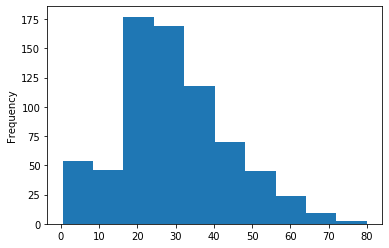

In [7]:
titanic_data["Age"].plot.hist()

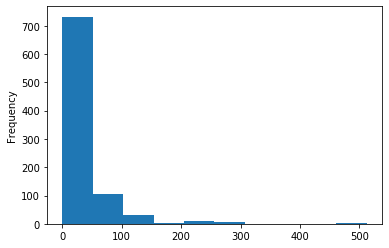

In [8]:
titanic_data["Fare"].plot.hist()
# need to increase the bin size

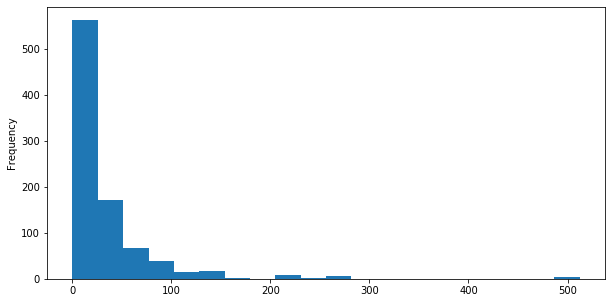

In [9]:
titanic_data["Fare"].plot.hist(bins = 20, figsize =(10,5) )

In [10]:
# let's see the rest of the information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


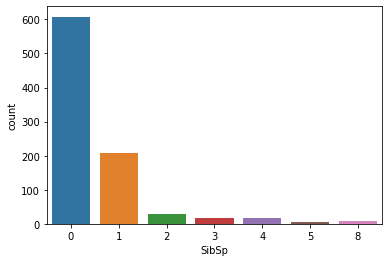

In [11]:
sns.countplot(x="SibSp", data = titanic_data)

## Data Wrangling

### remove all unnecessary items in the data such as null values

In [12]:
titanic_data.isnull()
# let's see if any of the data is null or not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
titanic_data.isnull().sum()
# this will print the number of passengers with null values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

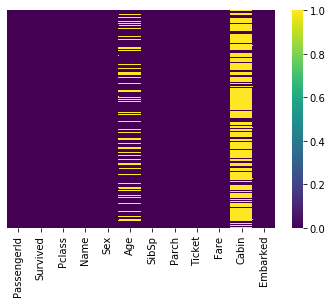

In [14]:
# Let' visualize the method
sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap = "viridis")

# cmap is for color coding

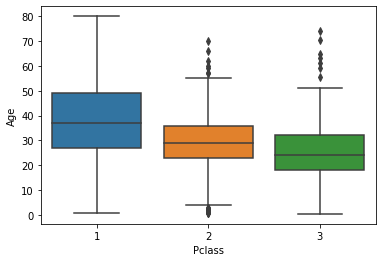

In [15]:
sns.boxplot(x="Pclass", y = "Age", data = titanic_data)

# We can also split it up by age difference vs class in a nice boxplot

In [16]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Let's just drop the coloumn that contains all the null values to get rid of it
# this can be done as follows, but first we need to get rid of it because
# this is part of data Wrangling

titanic_data.drop("Cabin", axis=1, inplace=True)
# What does axis and inplace do here

In [18]:
titanic_data.head(5)
# let's see if they dropped well

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
titanic_data.dropna(inplace=True)

# I think the inplace part is that it is not false in the isnull function
# This above function will drop all the values that are NA

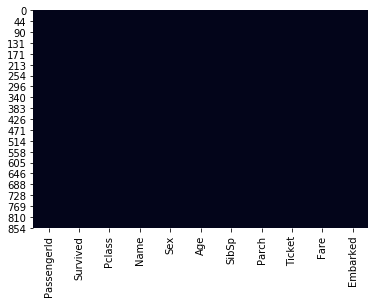

In [20]:
# Now let's check again if those values are there for nulls
# we will use a heatmap again
sns.heatmap(titanic_data.isnull(), cbar=False)
# cbar gets rid of all colors

In [21]:
# let's see if this gets rid of all those values visually
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# time 32.14 stop here
pd.get_dummies(titanic_data['Sex'])
# notice that it gives you two columns. You only need one so you 
# can use drop_first=True

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [23]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [24]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embarked = pd.get_dummies(titanic_data['Embarked'])

In [26]:
embarked.head(5) 
## need to drop those other columns

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
# now for some PCL stuff
Pcl= pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head(5)


,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
titanic_data = pd.concat([titanic_data, sex, embarked, Pcl], axis=1)

In [30]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
titanic_data.drop(["Sex","Embarked", 'PassengerId', 'Name',"Ticket"],axis=1, inplace=True)

# we need the axis so that it knows where the embarked and Name are

In [32]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [33]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [35]:
titanic_data.head(5)
# This is the data after cleaning it. We data wrangled it

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train and Test

In [41]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]

In [42]:
# know let's get into the sklearn part
from sklearn.model_selection import train_test_split


In [48]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train,y_train)

C:\Users\Natha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test, predictions)
"""
105 model predicted no and it was actually no
21 model predicted yes but actually no
25 model predicted no, but actually yes
63 model predicted yest and actually yest
"""


array([[105,  21],
       [ 25,  63]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,predictions)
# 78 percent is okay
# this number is actually 105 + 63 / (25 + 21+ 63 + 195)

0.7850467289719626